In [1]:
import numpy as np
from meshes.truss_like_mesh import truss_like_cross
from pybandgap.set_structure import fine_irreducible_brillouin_zone, map_prop, Material, Props
from pybandgap.plot_mesh import plot_IBZ, plot_structure
from pybandgap.bandgap import bandgap
from pybandgap.mass_and_stiffness_matrix import matrix_and_stiffness_matrix, multiple_materials_matrix

msh, *_ = truss_like_cross()

In [2]:
elements, condition = fine_irreducible_brillouin_zone(msh)

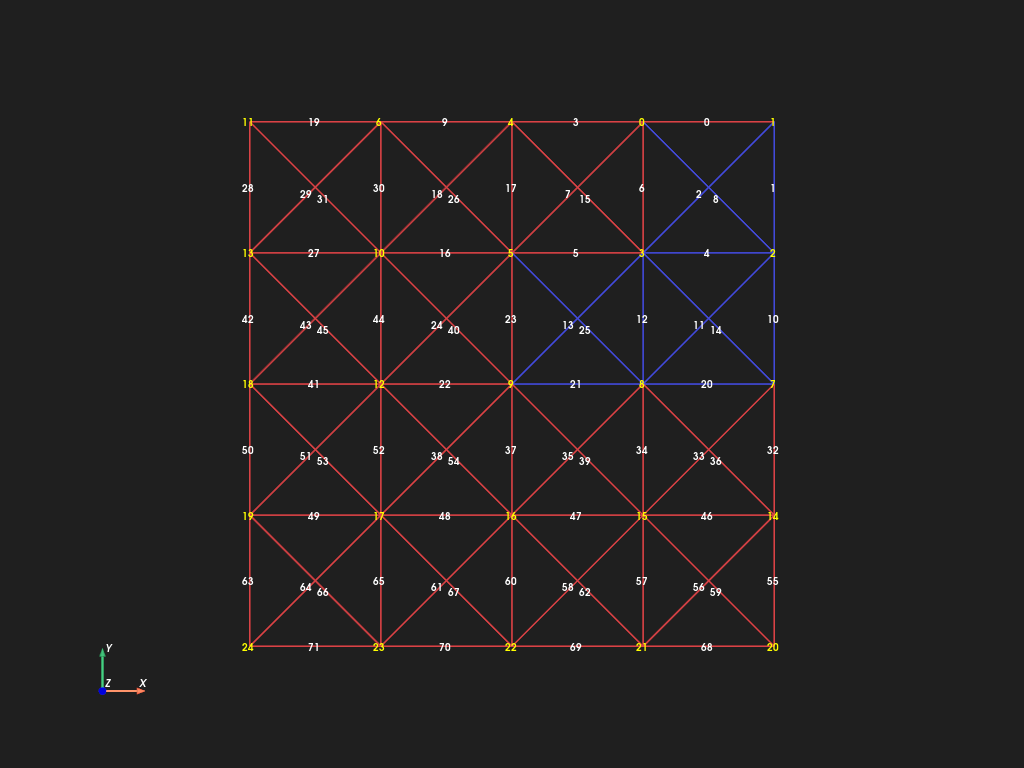

In [3]:
plot_IBZ(msh, elements)

In [4]:
tungsten_elements = [1, 2, 4, 8]
max_diameter_elements = np.append(tungsten_elements, 13)

In [5]:
aluminio = Material('aluminio', young_modulus=70e9, poisson_ratio=0.33, density=2.7e3)
tungsteno = Material('tungsteno', young_modulus=411e9, poisson_ratio=0.28, density=19.3e3)

In [6]:
material_elements = np.array([
    tungsteno if i in tungsten_elements else aluminio
    for i in elements])

diameters_elements = np.array([
    0.008 if i in max_diameter_elements else 0.004
    for i in elements])

In [7]:
props = Props(msh)
props.set_prop('diameters', diameters_elements)
props.set_prop('materials', material_elements)

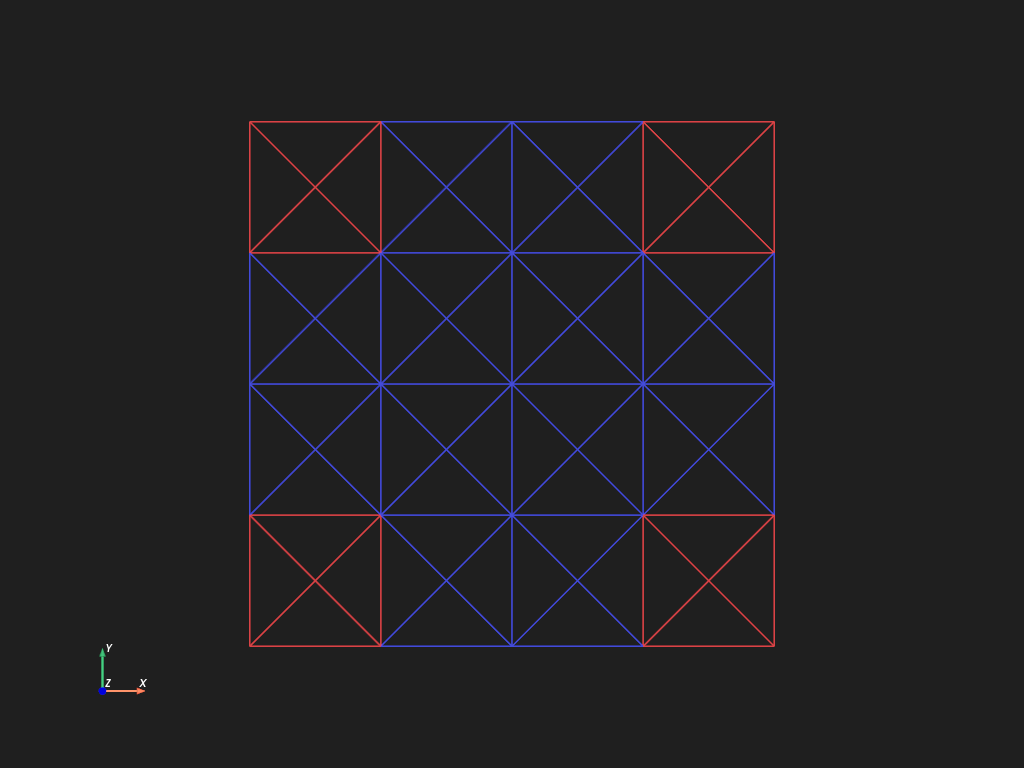

In [8]:
plot_structure(msh, props)

In [9]:
mass_matrix, stiffness_matrix = matrix_and_stiffness_matrix(msh, props)

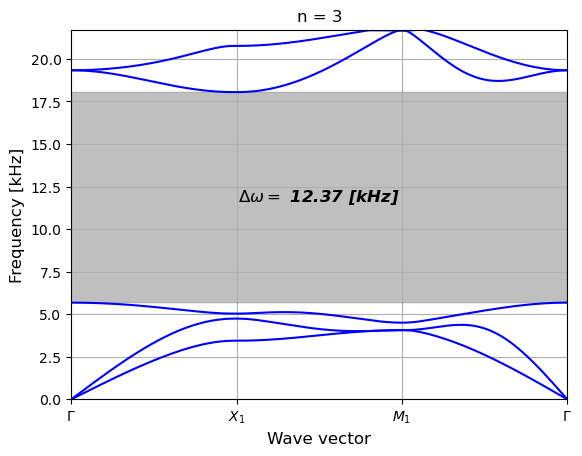

In [10]:
_ = bandgap(3, msh, mass_matrix, stiffness_matrix, N_eig = 5, plot= True, NINT=50)